In [27]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

## 1. Data Loading and Exploration

In [63]:
cardiotocography = fetch_ucirepo(id=193) 
  
X = cardiotocography.data.features 
y = cardiotocography.data.targets
df = X.join(y)

In [64]:
print("Dataset Shape", df.shape)

Dataset Shape (2126, 23)


In [65]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.000,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,...,200,5,3,76,107,107,170,0,8,3
6,134,0.001,0.0,0.013,0.008,0.0,0.003,29,6.3,0,...,200,6,3,71,107,106,215,0,8,3
7,122,0.000,0.0,0.000,0.000,0.0,0.000,83,0.5,6,...,130,0,0,122,122,123,3,1,9,3
8,122,0.000,0.0,0.002,0.000,0.0,0.000,84,0.5,5,...,130,0,0,122,122,123,3,1,9,3
9,122,0.000,0.0,0.003,0.000,0.0,0.000,86,0.3,6,...,130,1,0,122,122,123,1,1,9,3


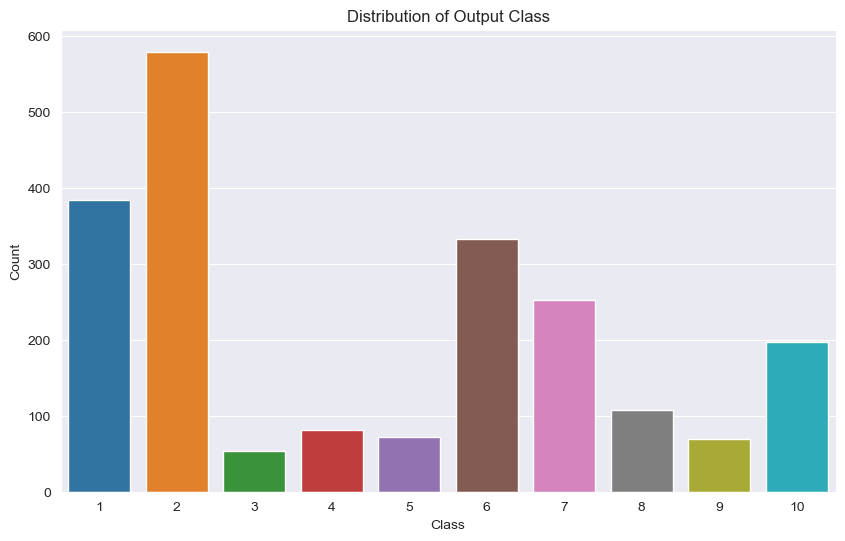

In [67]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="CLASS")

plt.title("Distribution of Output Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [87]:
class_counts = df['CLASS'].value_counts()
for i in class_counts.index:
    percent = (class_counts[i] / class_counts.sum()) * 100
    print(f"Percentage of samples with Class {i}: {percent:.2f}%")

Percentage of samples with Class 2: 27.23%
Percentage of samples with Class 1: 18.06%
Percentage of samples with Class 6: 15.62%
Percentage of samples with Class 7: 11.85%
Percentage of samples with Class 10: 9.27%
Percentage of samples with Class 8: 5.03%
Percentage of samples with Class 4: 3.81%
Percentage of samples with Class 5: 3.39%
Percentage of samples with Class 9: 3.25%
Percentage of samples with Class 3: 2.49%


One thing to note is that some of the classes have significantly fewer samples, like Class 8, 4, 5, 9, and 3. We may want to consider using stratified splitting to create the dev and test sets.

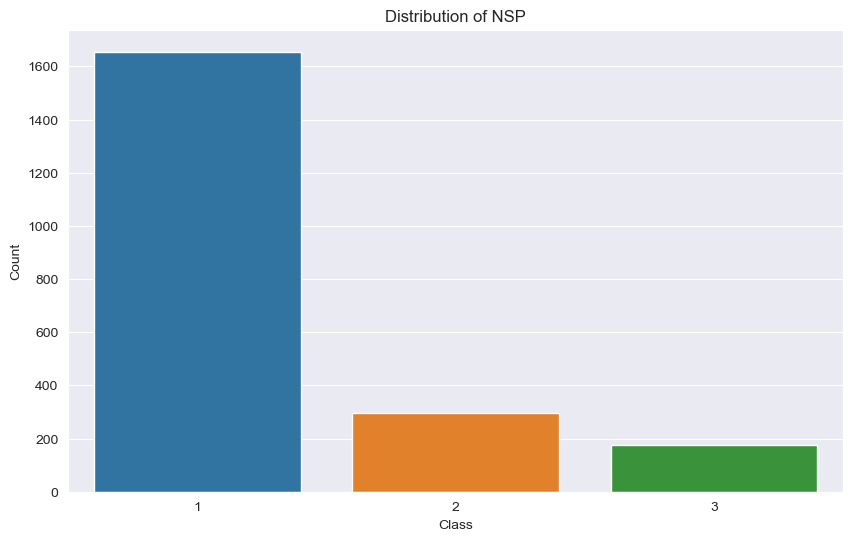

In [88]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="NSP")

plt.title("Distribution of NSP")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In addition to the output class "Class" with 10 classes, we have the NSP (fetal state class code) which can be used for 3 class classification.

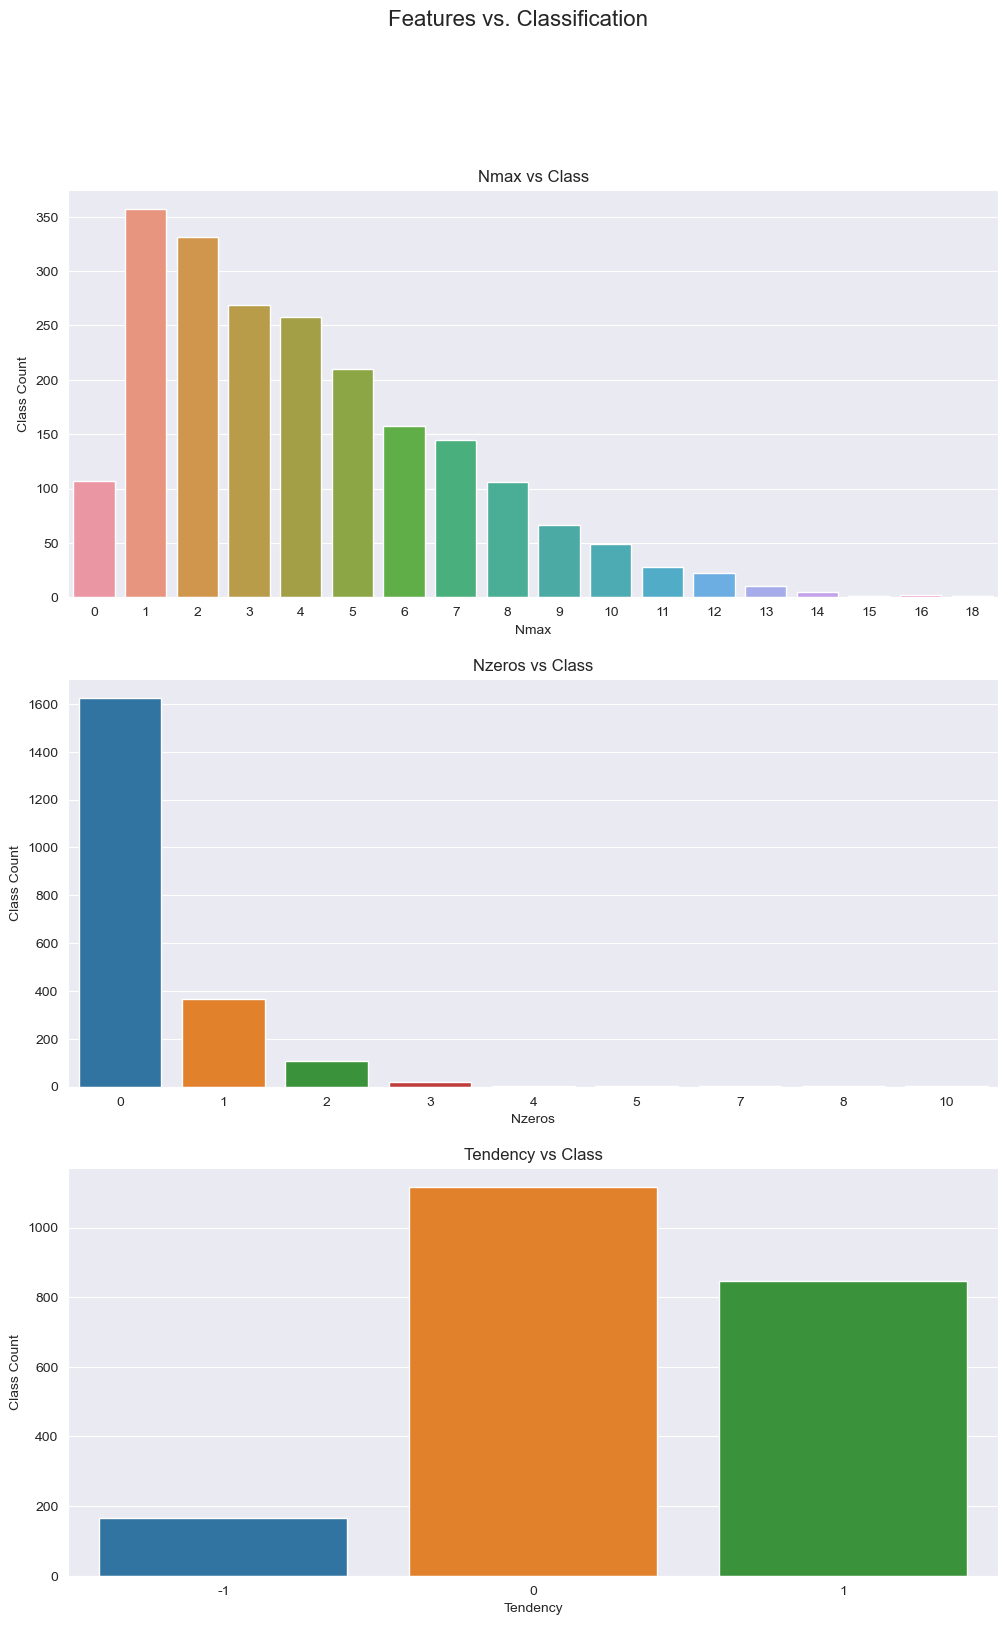

In [104]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Features vs. Classification', fontsize=16)

features = ['Nmax', 'Nzeros', 'Tendency']
barplots = ['Nmax', 'Nzeros', 'Tendency']

for ax, feature in zip(axes.flatten(), features):
    if feature in barplots:
        sns.countplot(data=df, x=feature, ax=ax)
    else:
        sns.stripplot(data=df, y=feature, x="CLASS", ax=ax)
    
    ax.set_title(feature + ' vs Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Class Count')

plt.show()

{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

In [53]:
X

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,40,137,177,4,0,153,150,152,2,0
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,66,103,169,6,0,152,148,151,3,1
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,67,103,170,5,0,153,148,152,4,1
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,66,103,169,6,0,152,147,151,4,1
